In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import matplotlib.image as pimg

Mounted at /content/drive


In [16]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
from scipy import ndimage
%matplotlib inline

**Loading training data**

In [3]:
data= pd.read_csv('/content/drive/MyDrive/GitHub/APL405-1/Week_05_NeuralNetworks/Assignment_05/fashion-mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


**Loading testing data**

In [6]:
#Read in the test data at this point
data_test= pd.read_csv('/content/drive/MyDrive/GitHub/APL405-1/Week_05_NeuralNetworks/Assignment_05/fashion-mnist_test.csv')
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


**Displaying some values**

In [21]:
def displayData(X, example_width=None, figsize=(28, 28)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

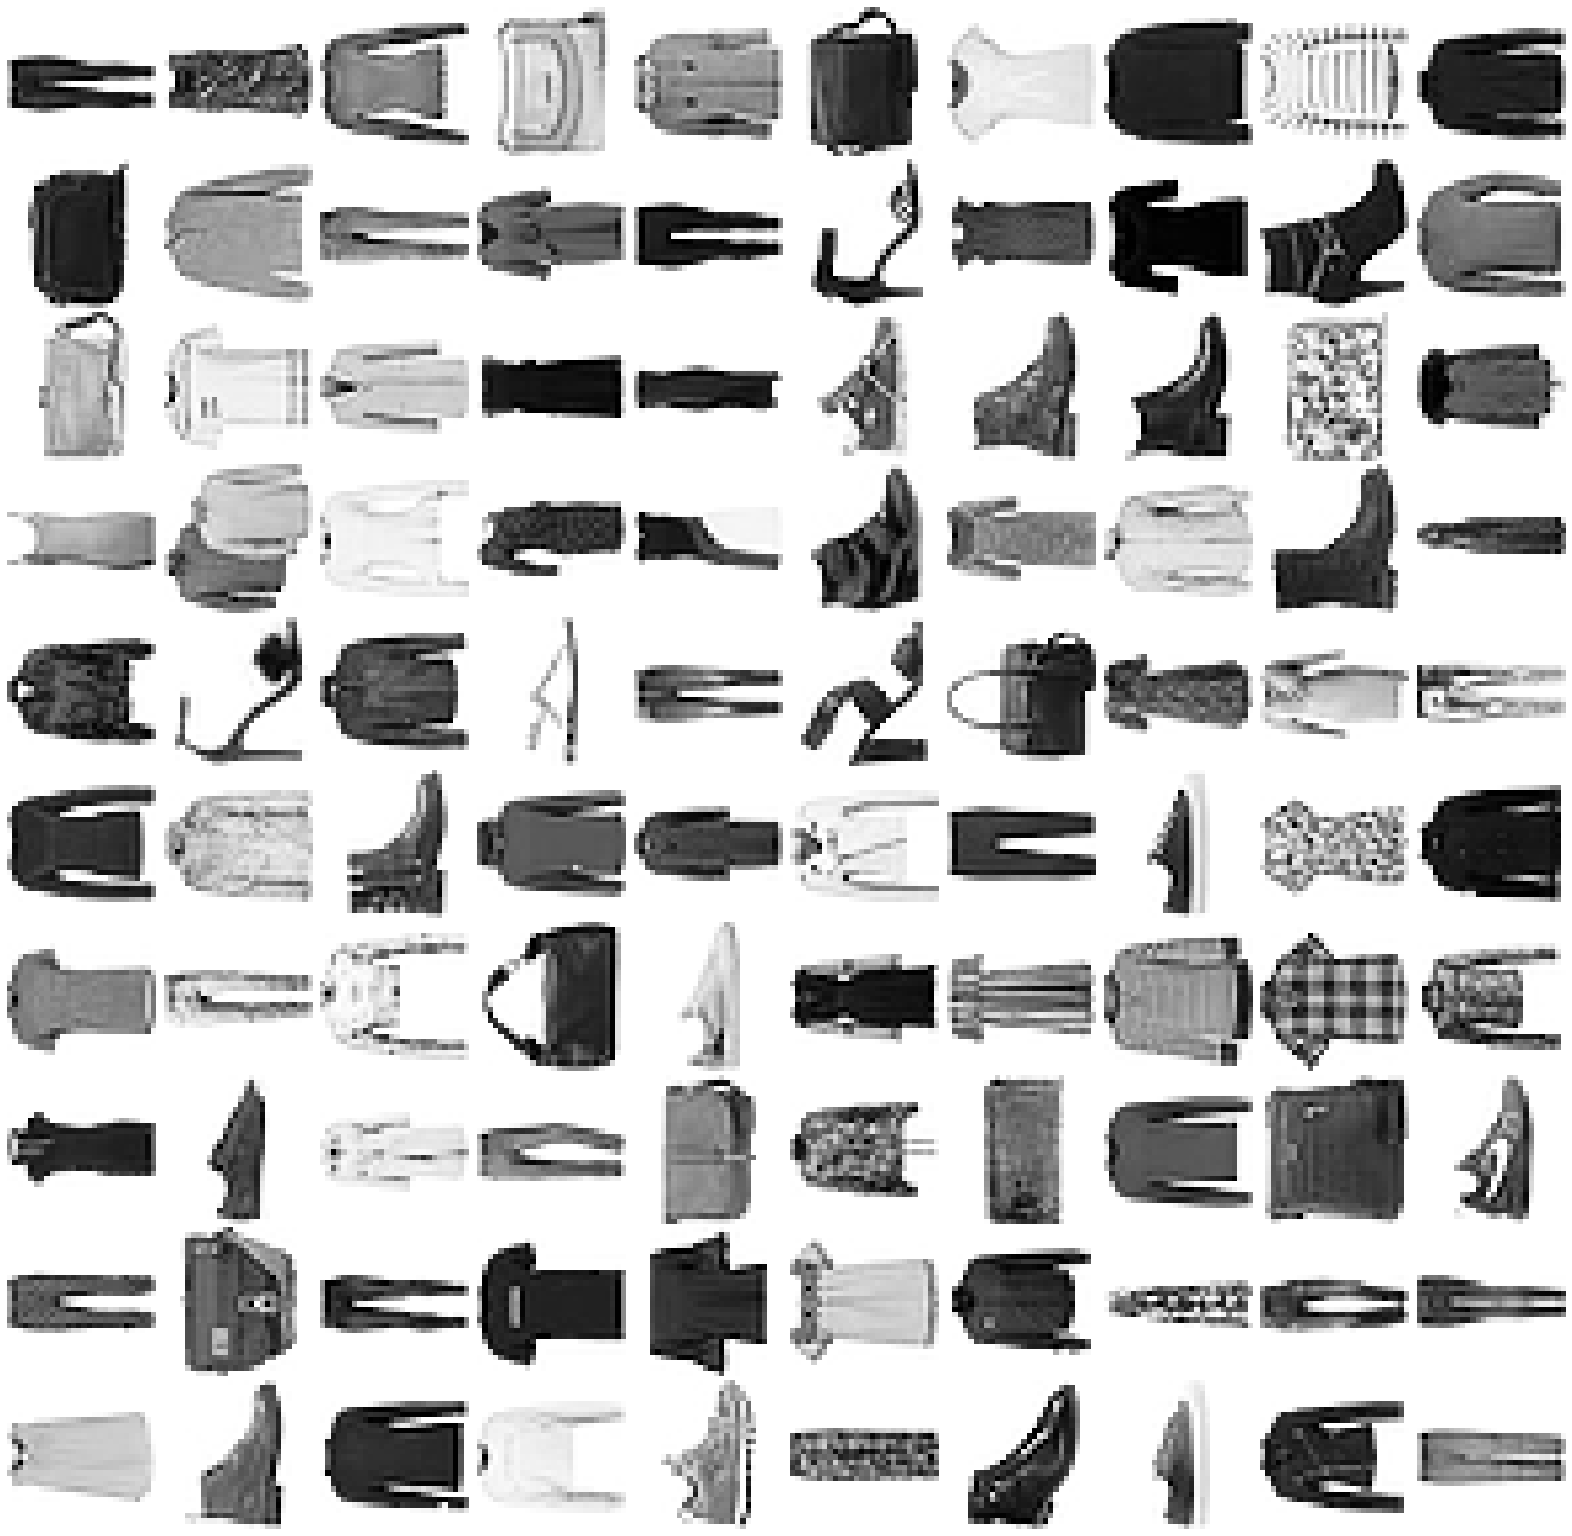

In [22]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(y.size, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [4]:
#Segregate the data, normalise the feature vector, initialise a dictionary corresponding to the output array and map it. 
#Print a subset of the data like we did for the hand-written digit classification
def data_clean_Display(data):
  # 'data' is a pandas datafram
  d = data.to_numpy()
  y = d[:,0]
  x = d[:,1:] 
  X =  (x - x.min())/(x.max() - x.min())
  return X,y
  pass

**Examples of traing data**

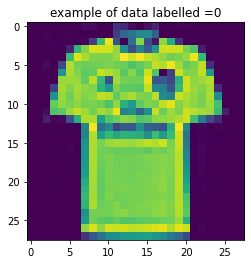

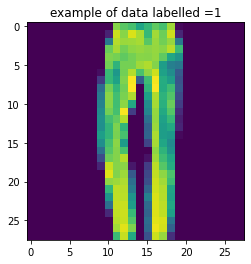

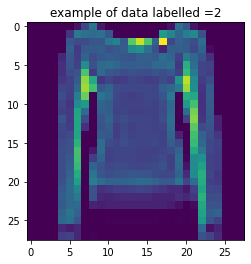

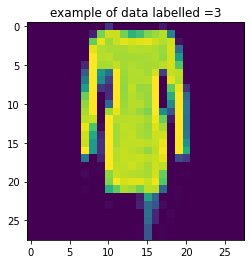

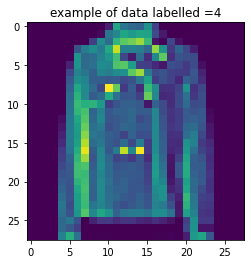

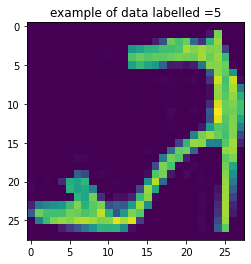

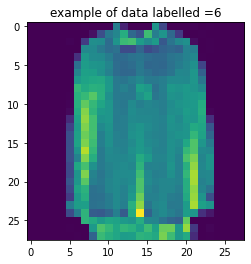

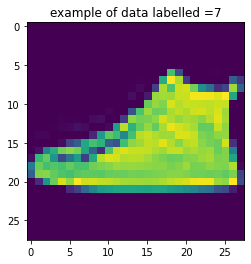

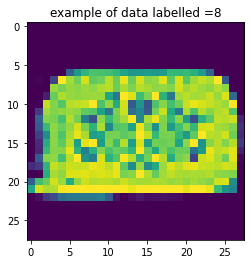

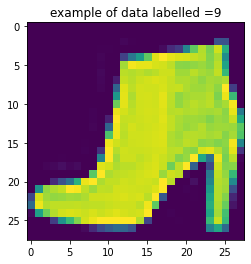

In [ ]:
#Write code here to display sample set of data
data1 = data.to_numpy()
l1 = [0,1,2,3,4,5,6,7,8,9]
x1 = np.array([])

for j in range(10):
  for i in range(len(data1)):
    if data1[i,0] == l1[j]:
      x1 = data1[i,1:]
      break
  a1 = np.reshape(x1,(28,28)) 
  plt.figure(i)
  image = plt.imshow(a1)
  plt.title('example of data labelled ={}'.format(l1[j]))

**Sigmoid and Gradient Sigmoid**

In [25]:
#Implement the sigmoid function
def sigmoid(z):
  pass
  g = 1/(1+np.exp(-1*z))
  return g

In [28]:
#implement the gradient of the sigmoid function
def sigmoidGradient(z):
  pass
  a = sigmoid(z)
  g = a*(1-a)
  return g

**Predicting values for 1 hidden layer**

In [26]:
# Prediction based on trained model
# Use sigmoid function to calculate probability rounded off to either 0 or 1
#Prediction function for single hidden layer.
def predictSingleHiddenLayer(w1, w2, X): 
  pass    # 'p' should be a vector of size equal to that of vector 'y'
  if X.ndim==1:
    X=X[None]
  
  m=X.shape[0]
  num_labels= w2.shape[0]
  p= np.zeros(m)
  a1= np.concatenate([np.ones((m,1)), X], axis=1) #Input layer
  a2= sigmoid(a1.dot(w1.T)) #Hidden Layer
  a2= np.concatenate([np.ones((a2.shape[0],1)), a2 ], axis=1) #Activation of 2nd layer
  a3= sigmoid(a2.dot(w2.T))
  p= np.argmax(a3, axis=1)
  return p

**Predicting values for 2 hidden layers**

In [27]:
#Prediction function for double hidden layer.
def predictDoubleHiddenLayer(w1, w2, w3, X): 
  pass    # 'p' should be a vector of size equal to that of vector 'y'
  if X.ndim==1:
    X=X[None]
  
  m=X.shape[0]
  num_labels= w3.shape[0]
  p= np.zeros(m)
  a1= np.concatenate([np.ones((m,1)), X], axis=1) #Input layer
  a2= sigmoid(a1.dot(w1.T)) #Hidden Layer
  a2= np.concatenate([np.ones((a2.shape[0],1)), a2 ], axis=1) #Activation of 2nd layer
  a3= sigmoid(a2.dot(w2.T))
  a3= np.concatenate([np.ones((a3.shape[0],1)), a3 ], axis=1) #Activation of 3rd layer
  a4 = sigmoid(a3.dot(w3.T))
  p= np.argmax(a4, axis=1)
  return p

**Layer and no. of neurons initalization**

In [29]:
# Setup the parameters you will use for this exercise 
# 2 hidden layers
input_layer_size  = 784
hidden_layer_size = 20
hidden_layer_size_One = 37
hidden_layer_size_Two = 13
num_labels = 10

**Wieghts initialization**

In [30]:
#randomly initialise weights.
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
  pass
  #L_in : int : Number of incomming connections. 
  #L_out : int : Number of outgoing connections.
  W = np.zeros((L_out, 1 + L_in))
  W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
  return W

**1 Hidden layer weight initialization**

In [31]:
# for 1 hidden layer
initial_w1 = randInitializeWeights(input_layer_size,hidden_layer_size)
initial_w2 = randInitializeWeights(hidden_layer_size,num_labels)

# Unroll parameters into a single array
initial_nn_params = np.concatenate([initial_w1.ravel(), initial_w2.ravel()], axis=0)

**2 Hidden layers wieght initialization**

In [32]:
# for 2 hiddeh layers
initial_w1h2 = randInitializeWeights(input_layer_size,hidden_layer_size_One)
initial_w2h2 = randInitializeWeights(hidden_layer_size_One,hidden_layer_size_Two)
initial_w3h2 = randInitializeWeights(hidden_layer_size_Two,num_labels)    #only when you're using the Second Hidden Layer

# Unroll parameters into a single array
initial_nn_params_h2 = np.concatenate([initial_w1h2.ravel(), initial_w2h2.ravel(), initial_w3h2.ravel()], axis=0)

**Cost function for 1 hidden layer**

In [33]:
def nnCostFunction1(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
  pass
  # Reshape nn_params back into the parameters w1 and w2, the weight matrices
  # for our 1 hidden layer
  w1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],(hidden_layer_size, (input_layer_size + 1)))
  w2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], (num_labels, (hidden_layer_size + 1)))

  # Setup some useful variables
  m = y.size
         
  # You need to return the following variables correctly 
  J = 0
  w1_grad = np.zeros(w1.shape)
  w2_grad = np.zeros(w2.shape)
    
  a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
  a2 = sigmoid(a1.dot(w1.T))
  a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
  a3 = sigmoid(a2.dot(w2.T))  
  y_matrix = y.reshape(-1)
  y_matrix = np.eye(num_labels)[y_matrix]
  
  temp1 = w1
  temp2 = w2
    
  # Add regularization term
    
  reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
  J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
  
  # Backpropogation
    
  delta_3 = a3 - y_matrix # Error of O/P layer 
  delta_2 = delta_3.dot(w2)[:, 1:] * sigmoidGradient(a1.dot(w1.T)) # Error of hidden layer [No error for I/P layer]
  Delta1 = delta_2.T.dot(a1)
  Delta2 = delta_3.T.dot(a2)
    
  # Add regularization to gradient

  w1_grad = (1 / m) * Delta1
  w1_grad[:, 1:] = w1_grad[:, 1:] + (lambda_ / m) * w1[:, 1:]
    
  w2_grad = (1 / m) * Delta2
  w2_grad[:, 1:] = w2_grad[:, 1:] + (lambda_ / m) * w2[:, 1:]
    
  grad = np.concatenate([w1_grad.ravel(), w2_grad.ravel()]) #Check the ravel() function? 
  return J,grad

**Cost function for 2 hidden layers**

In [34]:
def nnCostFunction2(nn_params,
                   input_layer_size,
                   hidden_layer_size_One,
                   hidden_layer_size_Two, 
                   num_labels,
                   X, y, lambda_=0.0):
  pass
  # Reshape nn_params back into the parameters w1 and w2, the weight matrices
  # for our 2 hidden layer
  n0 = input_layer_size
  n1 = hidden_layer_size_One
  n2 = hidden_layer_size_Two
  n3 = num_labels
  w1 = np.reshape(nn_params[: n1*(n0 +1)],(n1,n0 +1))
  w2 = np.reshape(nn_params[n1*(n0 +1): n1*(n0 +1) + n2*(n1 +1)], (n2,n1 +1))
  w3 = np.reshape(nn_params[n1*(n0 +1) + n2*(n1 +1) :], (n3,n2 +1))
  # Setup some useful variables
  m = y.size
         
  # You need to return the following variables correctly 
  J = 0
  w1_grad = np.zeros(w1.shape)
  w2_grad = np.zeros(w2.shape)
  w3_grad = np.zeros(w3.shape)
    
  a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
  a2 = sigmoid(a1.dot(w1.T))
  a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
  a3 = sigmoid(a2.dot(w2.T))
  a3 = np.concatenate([np.ones((a3.shape[0], 1)), a3], axis=1)
  a4 = sigmoid(a3.dot(w3.T))
  y_matrix = y.reshape(-1)
  y_matrix = np.eye(num_labels)[y_matrix]
  
  temp1 = w1
  temp2 = w2
  temp3 = w3
    
  # Add regularization term  
  reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])) + np.sum(np.square(temp3[:, 1:])))  
  J = (-1 / m) * np.sum((np.log(a4) * y_matrix) + np.log(1 - a4) * (1 - y_matrix)) + reg_term
  
  # Backpropogation
  delta_4 = a4 - y_matrix # Error of O/P layer 
  delta_3 = delta_4.dot(w3)[:, 1:] * sigmoidGradient(a2.dot(w2.T)) # Error of hidden layer 2
  delta_2 = delta_3.dot(w2)[:, 1:] * sigmoidGradient(a1.dot(w1.T)) # Error of hidden layer 1
  Delta1 = delta_2.T.dot(a1)
  Delta2 = delta_3.T.dot(a2)
  Delta3 = delta_4.T.dot(a3)
    
  # Add regularization to gradient

  w1_grad = (1 / m) * Delta1
  w1_grad[:, 1:] = w1_grad[:, 1:] + (lambda_ / m) * w1[:, 1:]
    
  w2_grad = (1 / m) * Delta2
  w2_grad[:, 1:] = w2_grad[:, 1:] + (lambda_ / m) * w2[:, 1:]

  w3_grad = (1 / m) * Delta3
  w3_grad[:, 1:] = w3_grad[:, 1:] + (lambda_ / m) * w3[:, 1:]
    
  grad = np.concatenate([w1_grad.ravel(), w2_grad.ravel(),w3_grad.ravel()])
  return J,grad

**Optimization for 1 hidden layer**

In [39]:
# Write code to pass the cost function to scipy's optimise.minimize for 1 hidden layer
options= {'maxiter': 4000}
lambda_ = 0.1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction1(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
print(res.message)
nn_params = res.x
        
# Obtain w1 and w2 back from nn_params
w1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],(hidden_layer_size, (input_layer_size + 1)))
w2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],(num_labels, (hidden_layer_size + 1)))

Max. number of function evaluations reached


**Optimization for 2 hidden layers**

In [40]:
# Write code to pass the cost function to scipy's optimise.minimize for 2 hidden layer
options= {'maxiter': 4000}
lambda_ = 0.1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction2(p, input_layer_size, hidden_layer_size_One,hidden_layer_size_Two, num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params_h2,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
print(res.message)
nn_params = res.x
        
# Obtain w1h2, w2h2 and w3h2 back from nn_params
n0 = input_layer_size
n1 = hidden_layer_size_One
n2 = hidden_layer_size_Two
n3 = num_labels
w1h2 = np.reshape(nn_params[:n1*(n0 +1)],(n1,n0 +1))
w2h2 = np.reshape(nn_params[n1*(n0 +1): n1*(n0 +1) + n2*(n1 +1)], (n2,n1 +1))
w3h2 = np.reshape(nn_params[n1*(n0 +1) + n2*(n1 +1) :], (n3,n2 +1))

Max. number of function evaluations reached


**Checking precision**

In [41]:
#Break the nn_params into weights depending on how many layers you're using and 
#pass it to the predict function according to the number of layers you're using.

#COMPARE the prediction efficiency of the NN from one hidden layer to double hidden layer

# for 1 hidden layer
p_h1 = predictSingleHiddenLayer(w1,w2,X)    # X is training data
a =np.array(p_h1 ==y).astype(int)
n = a.shape[0]
v1 = (np.sum(a)/n)*100

ph1 = predictSingleHiddenLayer(w1,w2,X1)    # X1 is testing data
a =np.array(ph1 ==y1).astype(int)
n = a.shape[0]
v2 = (np.sum(a)/n)*100

# for 2 hidden layers
p_h2 = predictDoubleHiddenLayer(w1h2,w2h2,w3h2,X)    # X is training data
a =np.array(p_h2 ==y).astype(int)
n = a.shape[0]
v1 = (np.sum(a)/n)*100
print('accuracy on training data with 2 hidden layer = {}'.format(v1))

ph2 = predictDoubleHiddenLayer(w1h2,w2h2,w3h2,X1)    # X1 is testing data
a =np.array(ph2 ==y1).astype(int)
n = a.shape[0]
v2 = (np.sum(a)/n)*100
print('accuracy on testing data with 2 hidden layer = {}'.format(v2))

#check how the learned weights are performing on the test data.

accuracy on training data with 1 hidden layer = 96.67
accuracy on testing data with 1 hidden layer = 86.66666666666667
accuracy on training data with 2 hidden layer = 99.92
accuracy on testing data with 2 hidden layer = 86.66666666666667


In [7]:
X,y = data_clean_Display(data)

In [8]:
X1,y1 = data_clean_Display(data_test)

Tittle is a tuple of predicted and actual label in order

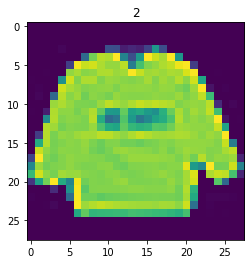

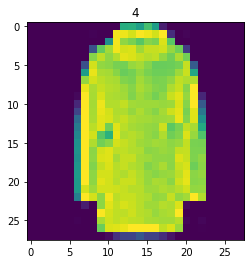

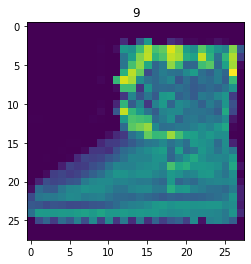

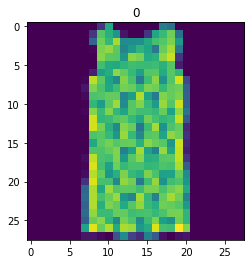

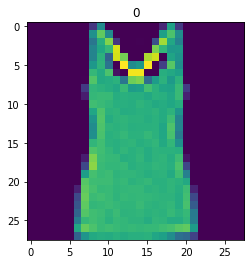

In [43]:
# Plotting testing examples for 1 hidden layer
for i in range(5):
  a = np.reshape(X1[6*i],(28,28))
  plt.figure(i)
  image = plt.imshow(a)
  plt.title(predictSingleHiddenLayer(w1,w2,X1)[6*i])

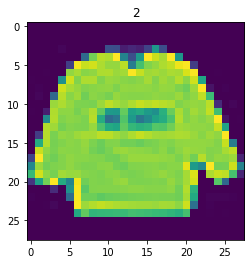

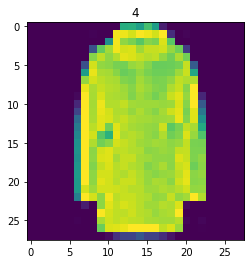

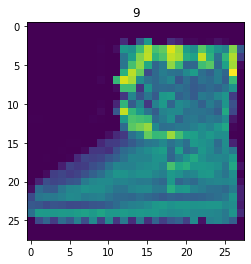

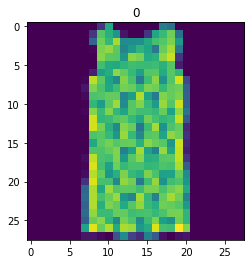

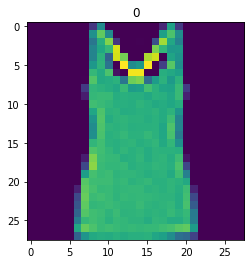

In [44]:
# Plotting testing examples for 2 hidden layers
for i in range(5):
  a = np.reshape(X1[6*i],(28,28))
  plt.figure(i)
  image = plt.imshow(a)
  plt.title(predictDoubleHiddenLayer(w1h2,w2h2,w3h2,X1)[6*i])

## Comments:

We observe the **accuracy of 2 hidden layer** is **more** than that of **1 hidden layer** for same no. of itterations.
This is beacause of more no. of neurons in 2 hidden layer system than compared to 1 layer system, so the 2 hidden layer will have **more wieghts** than compared to 1 hidden layer and thus will fit the data better.
The **regularization term** **avoids overfitting of the hypothesis**.
So this results in 2 hidden layer are more accurate than 1 hidden layer on the training set atleast, we see the the accuracy on the testing set being same, but we should consider the facto that the testing set has only 30 examples and **86.67% accuraccy => 4 incorrect out of 30**

One should also see the **number of testing examples** also. Since there is a chance that is the testing data had more data points then we could see difference between the accuracies of the 2 different no. of layers.